In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn import svm,metrics
import random
import numpy as np
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from plot_svm_mnnist import make_meshgrid,plot_contours
import matplotlib.pyplot as plt


In [2]:
from mnist import MNIST
mndata = MNIST(r'C:\Users\Aditya\Desktop\ML\week6')
images, labels = mndata.load_training()
images_test , labels_test = mndata.load_testing()

In [3]:
index = random.randrange(0, len(images))  # choose an index 
print(mndata.display(images[index]),labels[index])
X_train = np.array(images)
X_train = X_train/255.0*2 - 1
Y_train = np.array(labels).reshape(60000 , 1)
X_test = np.array(images_test)
X_test = X_test/255.0*2 - 1
Y_test = np.array(labels_test).reshape(10000,1)
print(np.shape(Y_test))


............................
............................
............................
............................
....................@@......
...................@@@......
...................@@@......
.........@@........@@@......
........@@@.......@@@.......
........@@@......@@@........
........@@@......@@@........
........@@@......@@@........
.......@@@@......@@@........
.......@@@@@.....@@@........
.......@@@@@@@@@@@@@........
.......@@@@@@@@@@@@@@.......
.......@@@@@@@@@@@@@@@......
.......@@@@....@@@@@@@......
.......@@@......@@@.........
................@@@.........
................@@@.........
................@@@.........
................@@@.........
................@@@.........
............................
............................
............................
............................ 4
(10000, 1)


In [4]:
#concatenating labels and images
print(np.shape(X_train))
print(np.shape(Y_train))
data = np.concatenate((X_train,Y_train) , axis = 1)
print(np.shape(data))

(60000, 784)
(60000, 1)
(60000, 785)


In [5]:
#randomly reshuffling dataset
np.random.shuffle(data)
new_data = data[0].reshape(785,1).T
print(np.shape(new_data))
print(np.shape(data))
#for i in range(0,10):
#    new_data=insert_data(new_data , data , i , 5000)
new_data = data
print(np.shape(new_data))
np.random.shuffle(new_data)
#as time complexity of svm is o(n^3)

(1, 785)
(60000, 785)
(60000, 785)


In [6]:
X_train = new_data[:20000,:784]
Y_train = new_data[:20000, 784:785]
print(np.shape(Y_train))
#X_test = new_data[40000: ,:784]
#Y_test = new_data[40000: , 784:785]
print(np.shape(Y_test))

index = 0
#for index in range(0,100):
#    print(mndata.display(X_train[index]),Y_train[index])

X_temp = X_train
pca = decomposition.PCA(n_components=2)
pca.fit(X_temp)
X_temp = pca.transform(X_temp)

(20000, 1)
(10000, 1)


In [7]:
classification = svm.SVC()
classification.fit(X_train,Y_train)
#support vectors 
support_vector = classification.support_vectors_
print(np.shape(support_vector))
Y_predicted = classification.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_test, Y_predicted))
print("Classification report for classifier %s:\n%s\n"
      % (classification, metrics.classification_report(Y_test, Y_predicted)))
print('accuracy is : ')
print(accuracy_score(Y_test , Y_predicted))


C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(6392, 784)
Confusion matrix:
[[ 970    0    2    0    0    3    3    1    1    0]
 [   0 1124    3    2    0    1    2    1    2    0]
 [   7    1  978    8    7    0    9   10   11    1]
 [   1    1   13  961    0   13    0    8    9    4]
 [   1    1    5    0  941    0    9    1    2   22]
 [   7    3    4   22    2  837    6    2    7    2]
 [   8    3    3    0    4    8  929    0    3    0]
 [   1   14   19    1    5    1    0  962    4   21]
 [   4    2    3   12    7   21    9    5  908    3]
 [   5    7    0   11   23    5    1    8    6  943]]
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.97      0.99      0.98      1135
          2     

In [8]:
classification = svm.SVC(probability=False,  # cache_size=200,
              kernel="poly", C=2.8, degree=10)
classification.fit(X_train,Y_train)
#support vectors 
support_vector = classification.support_vectors_
print(np.shape(support_vector))
Y_predicted = classification.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_test, Y_predicted))
print("Classification report for classifier %s:\n%s\n"
      % (classification, metrics.classification_report(Y_test, Y_predicted)))
print('accuracy is : ')
print(accuracy_score(Y_test , Y_predicted))


C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(7466, 784)
Confusion matrix:
[[ 973    0    2    0    0    1    1    1    2    0]
 [   0 1126    3    1    0    1    1    0    3    0]
 [   4    0 1006    2    1    0    2    4   12    1]
 [   0    0    3  988    0    6    0    8    5    0]
 [   1    0    3    0  956    0    5    0    1   16]
 [   2    0    0    7    0  876    2    1    2    2]
 [   7    2    0    0    3    4  940    0    2    0]
 [   0    7   12    1    1    0    0  994    1   12]
 [   1    0    2    5    1    6    0    3  953    3]
 [   5    3    3    7    9    2    0    7    7  966]]
Classification report for classifier SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2   

In [9]:
classification = svm.SVC(probability=False,  # cache_size=200,
              kernel="linear", C=2.8)
classification.fit(X_train,Y_train)
#support vectors 
support_vector = classification.support_vectors_
print(np.shape(support_vector))
Y_predicted = classification.predict(X_test)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Y_test, Y_predicted))
print("Classification report for classifier %s:\n%s\n"
      % (classification, metrics.classification_report(Y_test, Y_predicted)))
print('accuracy is : ')
print(accuracy_score(Y_test , Y_predicted))


C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(4328, 784)
Confusion matrix:
[[ 956    0    3    2    1    8    8    1    1    0]
 [   0 1112    5    2    0    1    3    1   10    1]
 [  11    6  924   25   10    5   13   11   24    3]
 [   7    5   20  903    1   36    0   13   22    3]
 [   1    2    9    0  924    1    9    4    4   28]
 [  14    5    9   53    7  770   11    2   17    4]
 [  12    4   19    1    6   18  897    0    0    1]
 [   2   11   18    8    9    0    0  944    1   35]
 [   9   13   16   57    9   41    9    7  811    2]
 [   7    8    1   15   53    3    0   27    5  890]]
Classification report for classifier SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       980
          1       0.95      0.98      0.97      1135
          2  

In [10]:
acc = []
RC = []
X_train = X_train[:500 ,:]
Y_train = Y_train[:500 ,:]
Y_test = Y_test[:300 , :]
X_test = X_test[:300 , :]
rc = 0.01
while rc<2:
    classification = svm.SVC(probability=False,  # cache_size=200,
                  kernel="rbf", C=rc, gamma=.0073)
    classification.fit(X_train,Y_train)
    Y_predicted = classification.predict(X_test)
    RC.append(rc)
    acc.append(accuracy_score(Y_test , Y_predicted))
    #print(rc,accuracy_score(Y_test , Y_predicted),sep='\t')
    rc = rc+0.01

C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


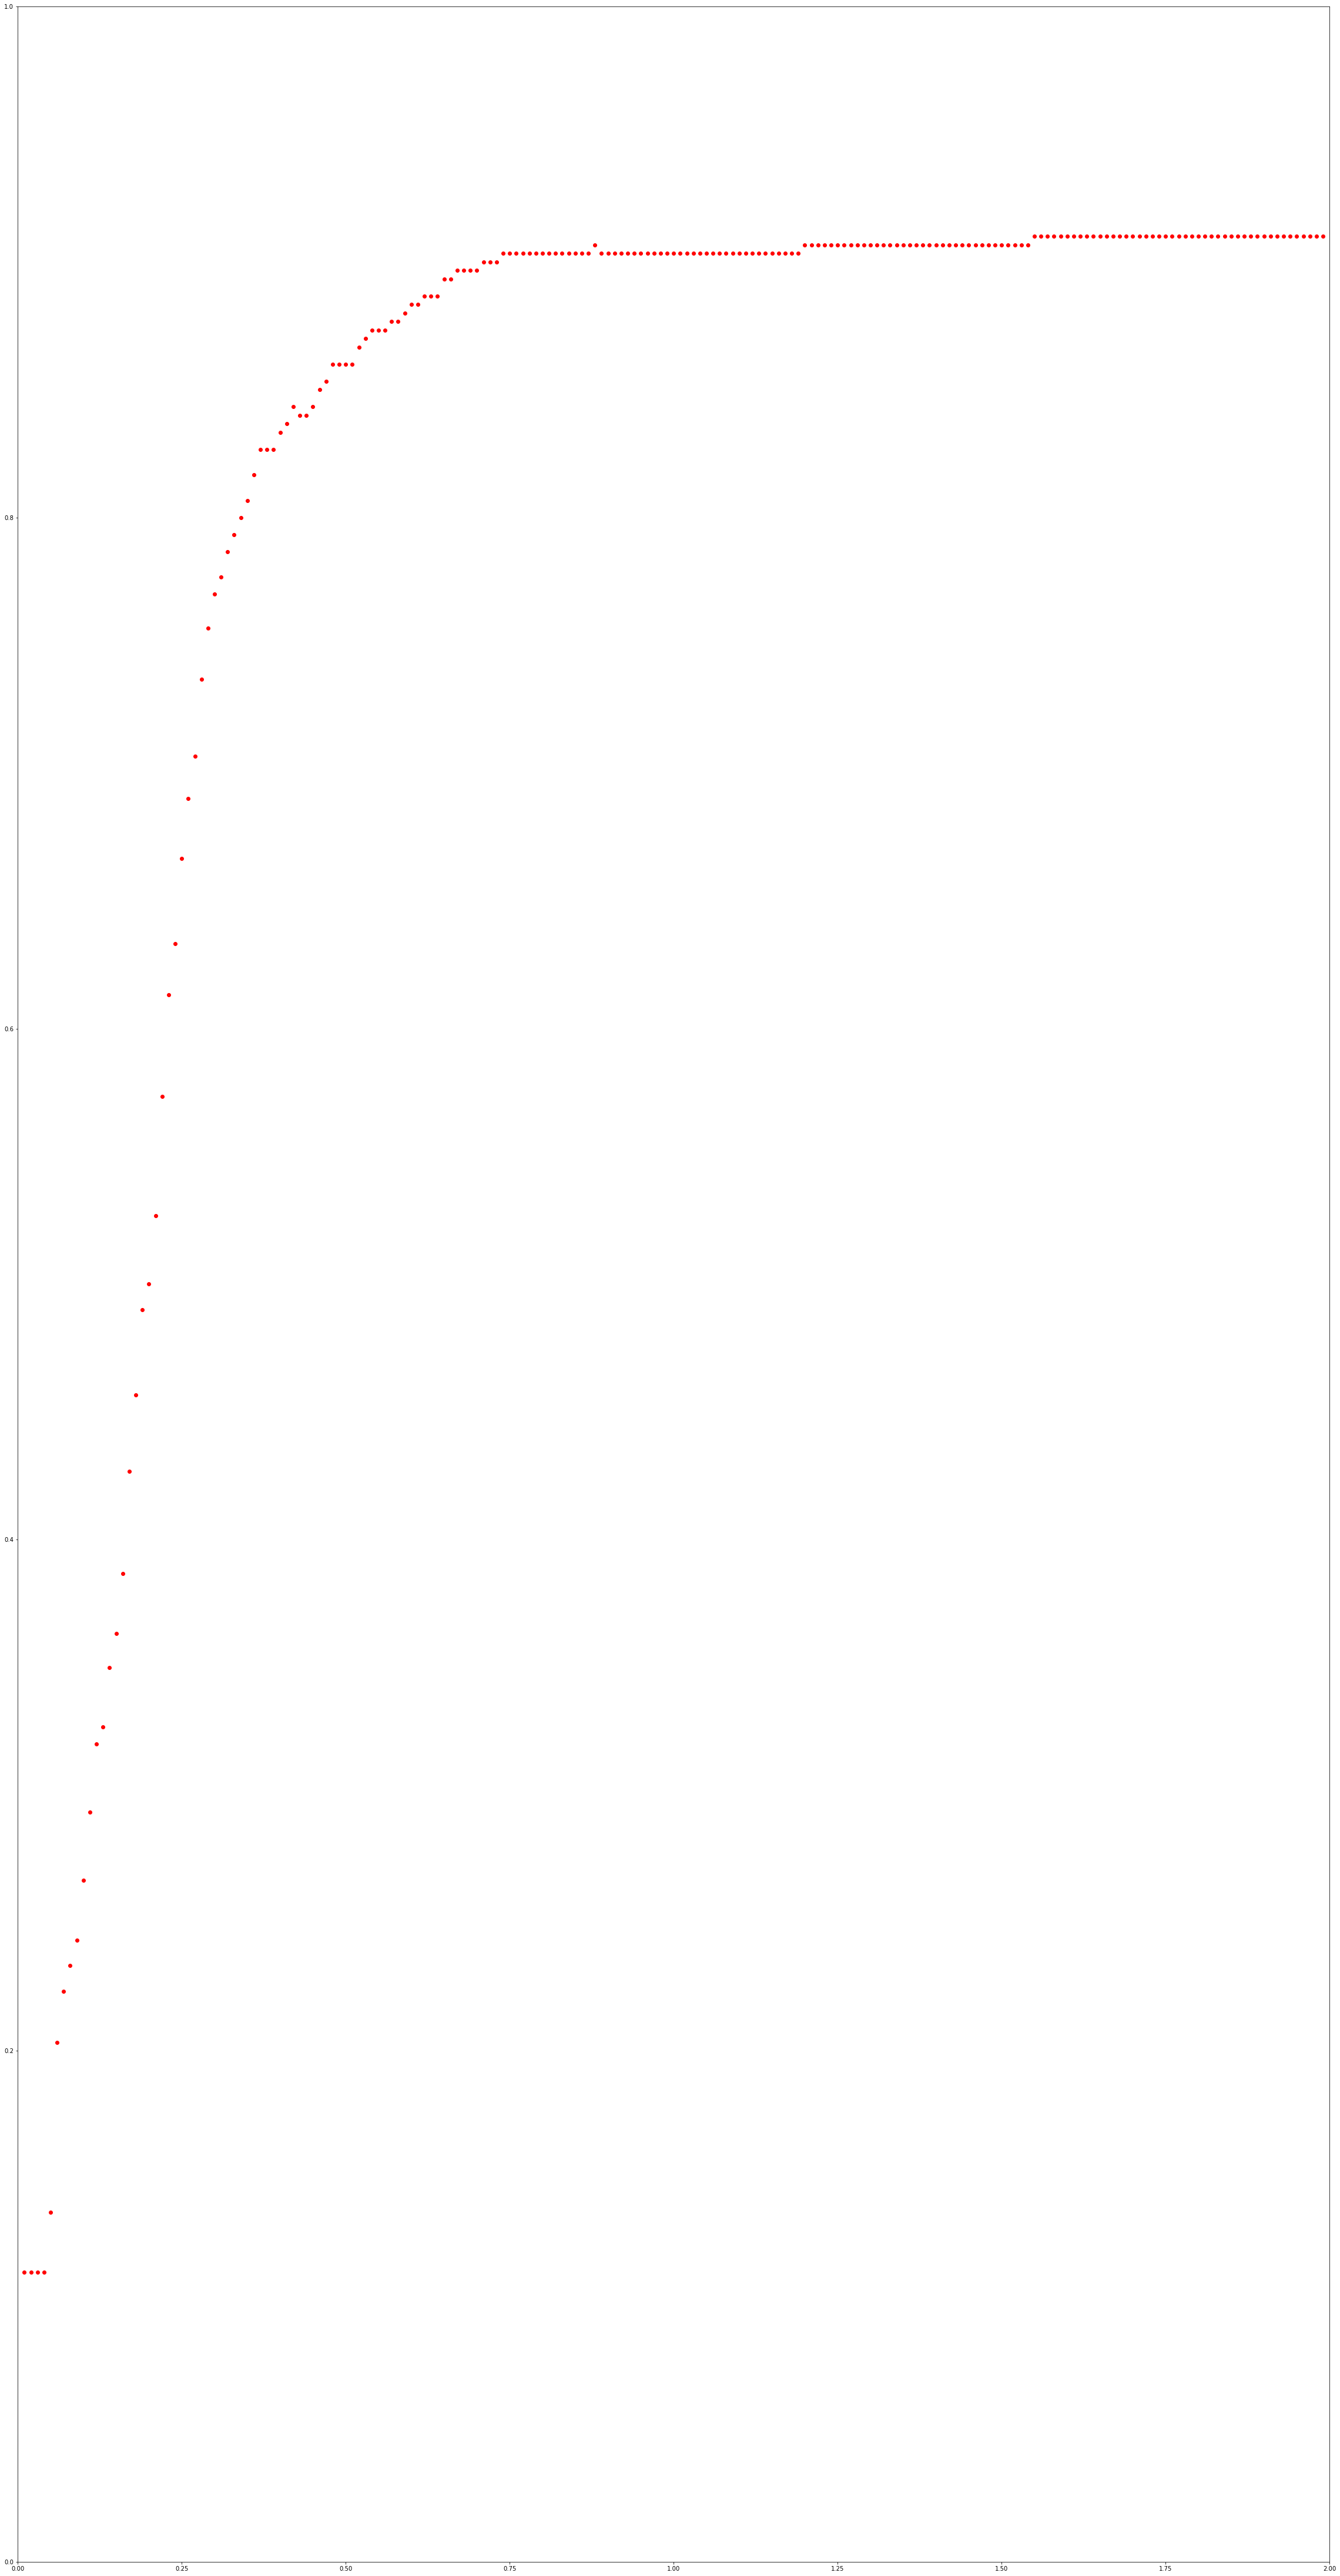

In [11]:
plt.plot(RC, acc, 'ro')
plt.axis([0, 2, 0, 1])
plt.show()

In [12]:
acc = []
GM = []
X_train = X_train[:500 ,:]
Y_train = Y_train[:500 ,:]
Y_test = Y_test[:300 , :]
X_test = X_test[:300 , :]
gm = 0.0001
while gm<0.005:
    classification = svm.SVC(probability=False,  # cache_size=200,
                  kernel="rbf", C=2, gamma=gm)
    #Penalty parameter C of the error term.
    #Kernel coefficient
    classification.fit(X_train,Y_train)
    Y_predicted = classification.predict(X_test)
    GM.append(gm)
    acc.append(accuracy_score(Y_test , Y_predicted))
    #print(rc,accuracy_score(Y_test , Y_predicted),sep='\t')
    gm = gm+0.00001

C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


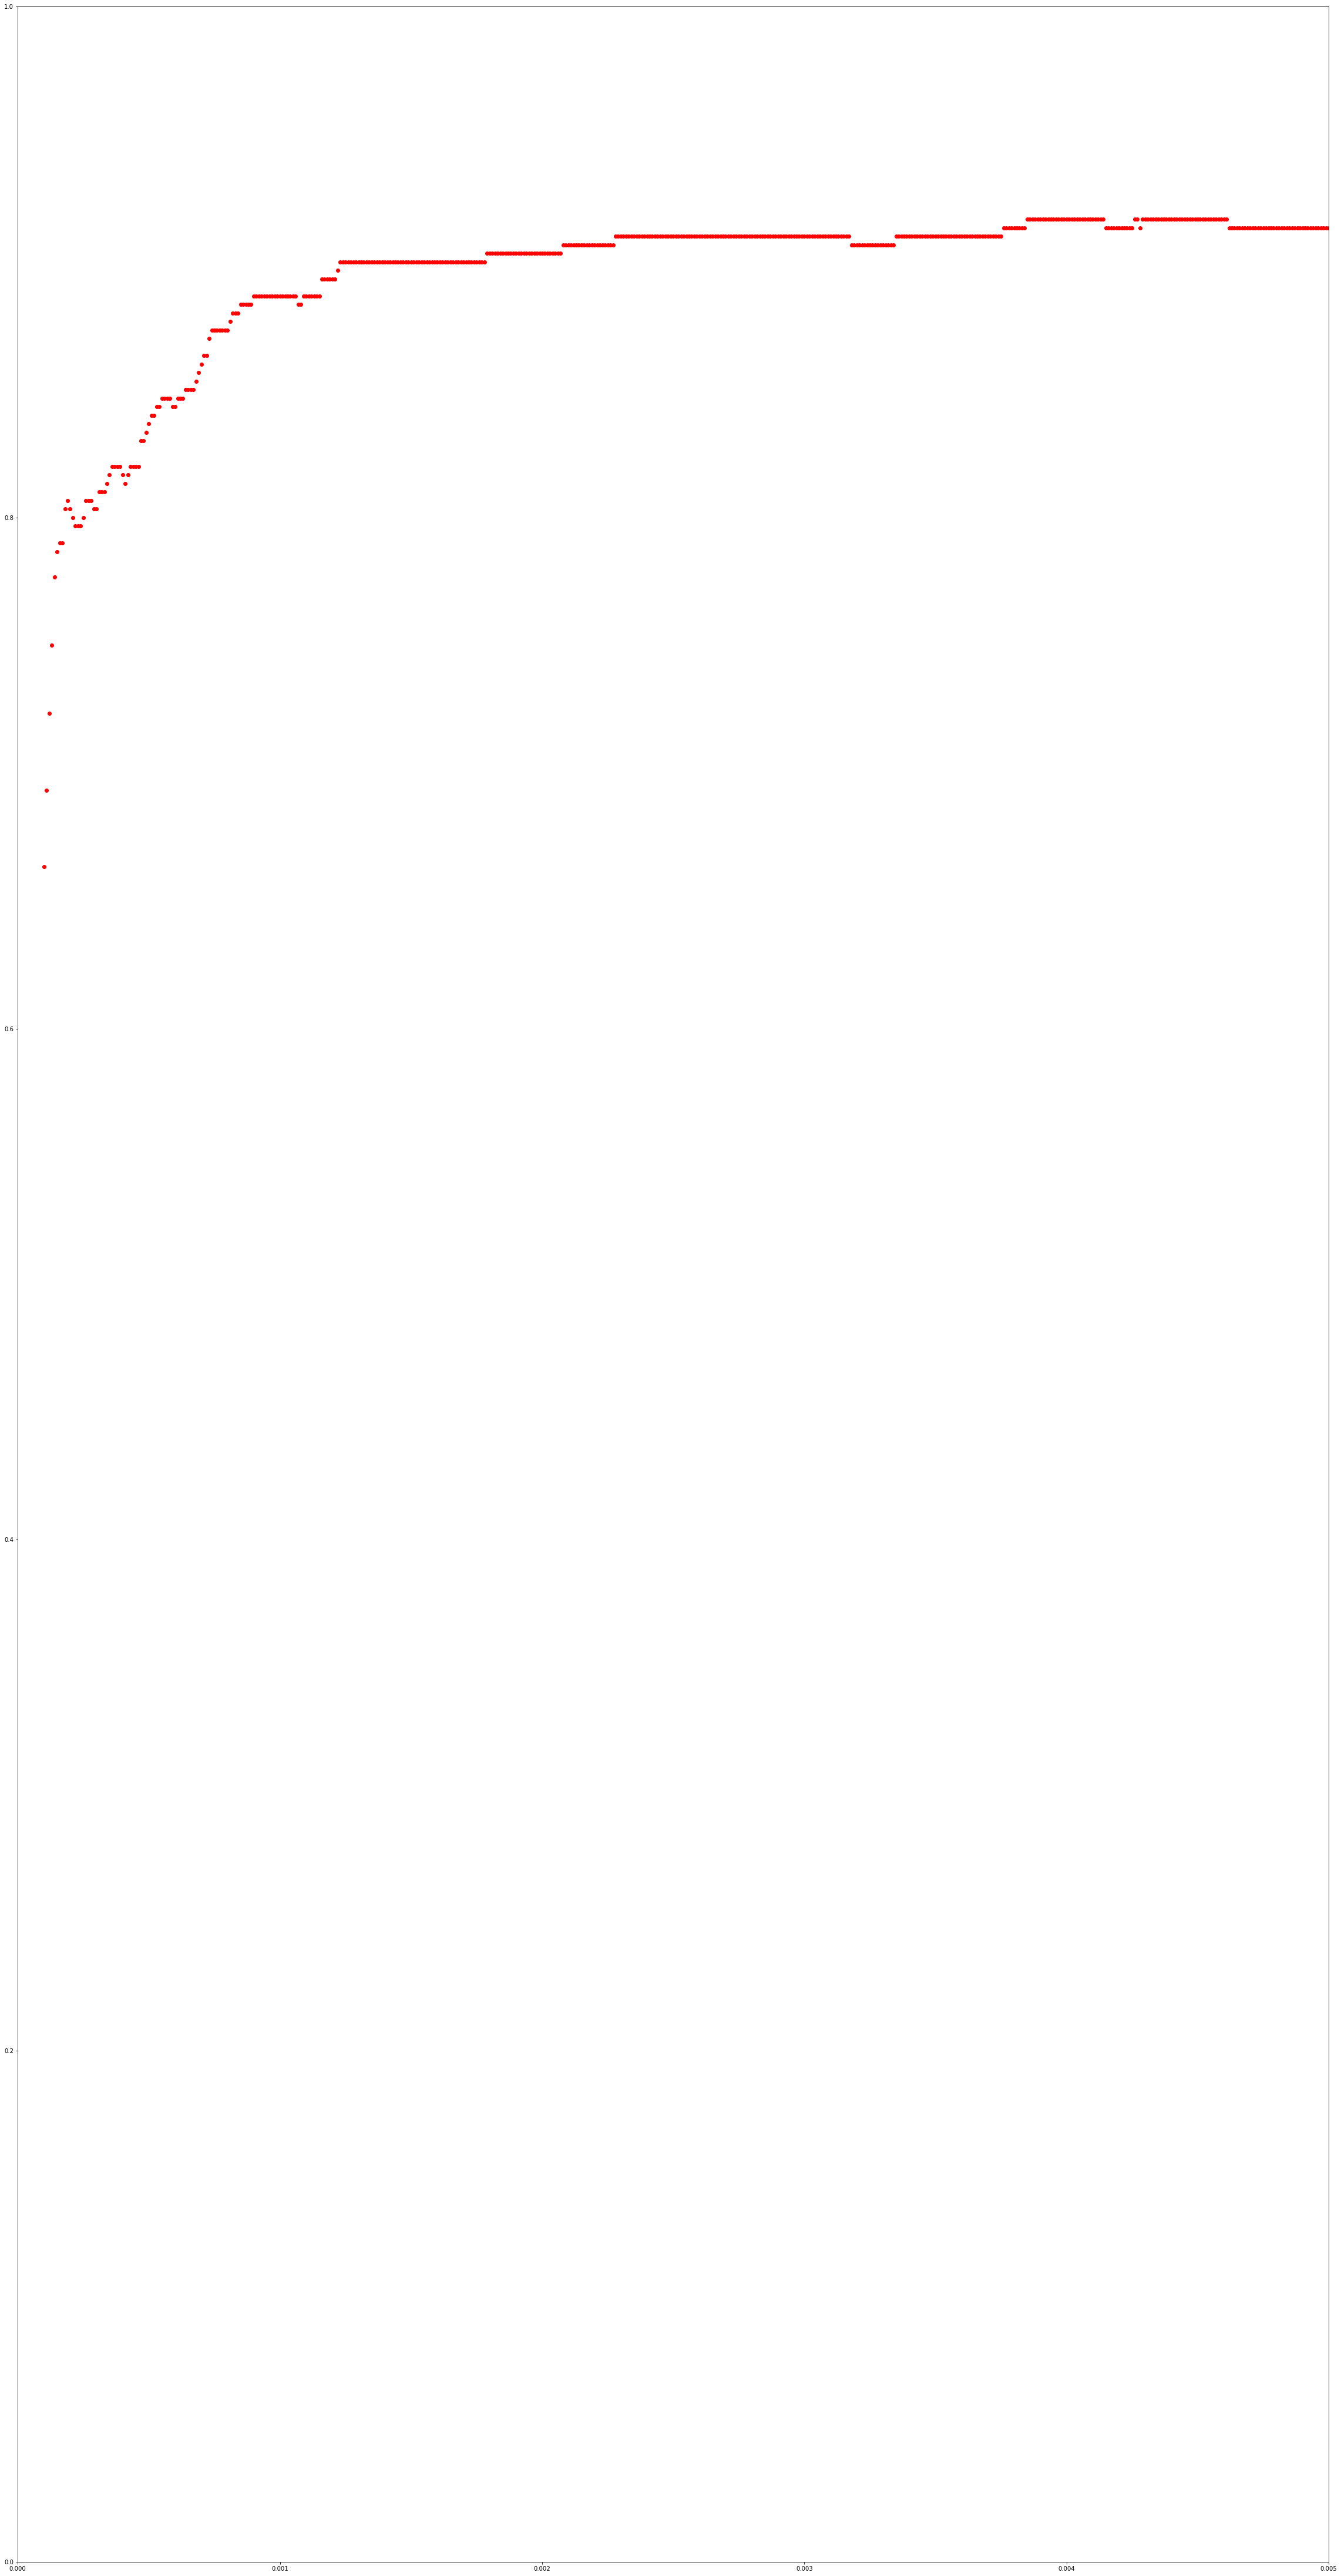

In [13]:
plt.plot(GM, acc, 'ro')
plt.axis([0, 0.005, 0, 1])
plt.show()

In [15]:
#logistic regression
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(500, 784)
(500, 1)
(300, 784)
(300, 1)


In [37]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(C=0.1,max_iter=1000)
logisticRegr.fit(X_train, Y_train)

C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)
print(len(predictions))

0.886666666667
300


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test, predictions)
print(cm)


[[21  0  1  0  0  0  0  1  1  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  1 27  1  0  0  0  2  0  1]
 [ 0  1  2 17  0  2  2  0  0  0]
 [ 0  0  0  0 32  1  1  0  0  3]
 [ 0  1  0  1  1 24  0  2  0  0]
 [ 1  0  1  0  0  0 21  1  0  0]
 [ 0  1  0  0  1  0  0 32  0  0]
 [ 0  0  1  0  0  0  0  0 20  0]
 [ 0  0  0  0  2  0  0  0  1 31]]


In [40]:
#neural network

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [41]:


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [42]:
encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aditya\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=784, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [45]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [47]:
results = cross_val_score(estimator, X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 49.60% (15.20%)
